In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [3]:
import pandas as pd

In [6]:
import pandas_datareader as web

In [10]:
spy_etf = web.DataReader('SPY','yahoo')

In [8]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2018-03-27 to 2018-03-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   High       1 non-null      int64
 1   Low        1 non-null      int64
 2   Open       1 non-null      int64
 3   Close      1 non-null      int64
 4   Volume     1 non-null      int64
 5   Adj Close  1 non-null      int64
dtypes: int64(6)
memory usage: 56.0 bytes


In [11]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-27,212.979996,210.759995,211.250000,212.699997,93214000.0,192.475937
2015-05-28,212.589996,211.630005,212.330002,212.460007,74974600.0,192.258804
2015-05-29,212.429993,210.820007,212.380005,211.139999,124919600.0,191.064285
2015-06-01,212.339996,210.619995,211.940002,211.570007,93338800.0,191.453415
2015-06-02,212.190002,210.270004,211.020004,211.360001,91531000.0,191.263336


In [12]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-25')

In [24]:
spy_etf = web.DataReader('SPY','yahoo',start,end)

In [25]:
aapl = web.DataReader('AAPL','yahoo',start,end)

aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.466835
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.512596
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.090879
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.042646
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.215786


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

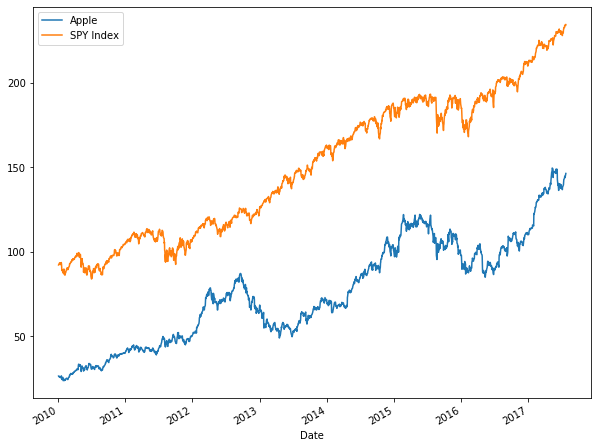

In [27]:
aapl['Adj Close'].plot(label='Apple',figsize=(10,8))
spy_etf['Adj Close'].plot(label='SPY Index')
plt.legend()
plt.plot();

In [28]:
aapl['Cumulative'] = aapl['Adj Close']/aapl['Adj Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Adj Close']/spy_etf['Adj Close'].iloc[0]

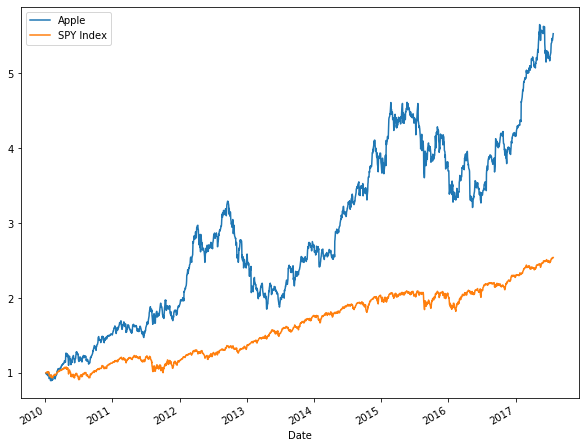

In [29]:
aapl['Cumulative'].plot(label='Apple',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.plot();

In [30]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)

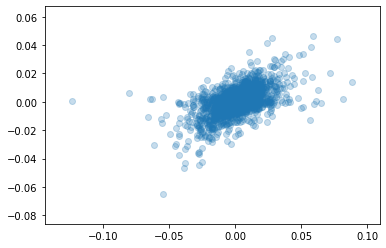

In [32]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25);

In [37]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],
                                                   spy_etf['Daily Return'].iloc[1:])

In [39]:
alpha

0.00021866523039705294

In [40]:
beta

0.32421322654586354

In [41]:
r_value

0.5550847554684726

In [42]:
p_value

3.5271073618341736e-154

In [43]:
std_err

0.011145775798976807

In [44]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004222
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [45]:
import numpy as np

In [46]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [47]:
noise

array([-0.00070157,  0.0004092 ,  0.00126839, ...,  0.00181758,
       -0.00110574, -0.00027125])

In [49]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

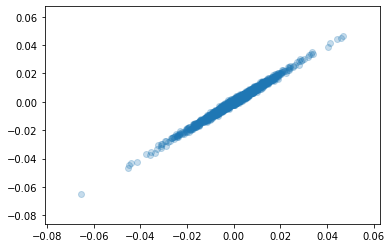

In [50]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25);

In [51]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,
                                                   spy_etf['Daily Return'].iloc[1:])

In [52]:
beta

0.9900126792024864

In [53]:
alpha

-3.541580694815284e-06

In [54]:
r_value

0.9941349469130034

In [55]:
p_value

0.0